# Advent of code

### Problem 1 (Circular Dial Password )

You are given a circular dial numbered 0-99 and a sequence of rotation instructions.

**Dial Properties:**
- The dial starts at position 50
- Rotating left (L) decreases the number; rotating right (R) increases it
- The dial wraps around: left from 0 goes to 99, right from 99 goes to 0

**Input:**
- A list of tuples `[(direction, distance), ...]` where:
  - `direction` is either `'L'` (left) or `'R'` (right)
  - `distance` is a positive integer

**Task:**
Count how many times the dial points at 0 **after completing** each rotation.

#### Part 1

In [8]:
with open('input_day1.txt', 'r') as file:
    instructions = []
 
    for line in file:
        direction = line[0]
        value = int(line[1:].strip())
        instructions.append((direction, value))
print(instructions[:5])
start = 50
counter = 0
for direction, value in instructions:
    if direction == 'L':
        start = (start-value) % 100
    elif direction == 'R':
        start = (start+value) % 100
    if start == 0:
        counter += 1
counter

[('R', 10), ('L', 39), ('L', 30), ('L', 9), ('R', 28)]


995

#### Part 2 ( Counting Zero Points)

Same setup as Part 1, but now count **every time** the dial points at 0, including:
- When a rotation **ends** at 0
- When the dial **passes through** 0 during a rotation


In [4]:
# test example:
 
instructions_test = [('L', 68), ('L', 30), ('R', 48), ('L', 5), ('R', 60), ('L', 55), ('L', 1), ('L', 99), ('R', 14), ('L', 82)]

In [14]:
#instructions
# answer is too high
start = 50
counter = 0
for direction, value in instructions:
    # print("current", counter, direction, value,start)
    if direction == 'L':
        start1 = start
        raw = (start-value) 
        hops = abs(raw // 100)
        if start1 % 100 == 0 and hops > 0:
            hops -= 1
        counter += hops

    elif direction == 'R':
        start1 = start
        raw = (start+value) 
        hops = abs(raw // 100)
        if start1 % 100 == 0 and hops > 0:
            hops -= 1
        counter += hops
        # print("after R"+str(value), counter, start)
    if raw % 100 == 0 and hops == 0:
        counter += 1
        
    start = raw % 100    

counter

5652

In [15]:
start = 50
counter = 0
for direction, value in instructions:
    old_start = start
    
    if direction == 'L':
        raw = start - value
    elif direction == 'R':
        raw = start + value
    ended_at_zero = (raw % 100 == 0)
    hops = abs((raw // 100) - (old_start // 100))

    if direction == 'L':
        if raw < start:
            if ended_at_zero:
 
                wraps = ((start - 1) // 100) - ((raw + 100 - 1) // 100)
            else:
                wraps = ((start - 1) // 100) - (raw // 100)
        else:
            wraps = 0
    else:   
        if raw > start:
            if ended_at_zero:
                # dont count the ending  
                wraps = ((raw - 100) // 100) - (start // 100)
            else:
                wraps = (raw // 100) - (start // 100)
        else:
            wraps = 0
    
    counter += wraps
    start = raw % 100
    
    #  if we ended at 0
    if ended_at_zero:
        counter += 1

In [16]:
counter

5847

### Problem: Invalid Product IDs

You are given a list of product ID ranges. Each range is defined by a start ID and end ID (inclusive). Your task is to find all "invalid" IDs within these ranges and return their sum.

**Invalid ID Definition:**
An ID is invalid if it consists of a sequence of digits repeated  twice.

**Examples of Invalid IDs:**
- `11` (digit "1" repeated twice)
- `6464` (sequence "64" repeated twice)
- `123123` (sequence "123" repeated twice)
- `99` (digit "9" repeated twice)

**Important:** Numbers never have leading zeros. For example, `0101` is not considered an ID.


In [19]:
with open('input_day2.txt', 'r') as file:
    ranges = file.readlines()[0].split(",")
ranges = [r.strip().split("-") for r in ranges]
ranges

[['82853534', '82916516'],
 ['2551046', '2603239'],
 ['805115', '902166'],
 ['3643', '7668'],
 ['4444323719', '4444553231'],
 ['704059', '804093'],
 ['32055', '104187'],
 ['7767164', '7799624'],
 ['25', '61'],
 ['636', '1297'],
 ['419403897', '419438690'],
 ['66', '143'],
 ['152', '241'],
 ['965984', '1044801'],
 ['1', '19'],
 ['376884', '573880'],
 ['9440956', '9477161'],
 ['607805', '671086'],
 ['255', '572'],
 ['3526071225', '3526194326'],
 ['39361322', '39455443'],
 ['63281363', '63350881'],
 ['187662', '239652'],
 ['240754', '342269'],
 ['9371', '26138'],
 ['1720', '2729'],
 ['922545', '957329'],
 ['3477773', '3688087'],
 ['104549', '119841']]

In [21]:
def repeats(string):
 
    if len(string) % 2 != 0:
        return False
    
    mid = len(string) // 2
    return string[:mid] == string[mid:]

# Test
repeats("labubulabu") 
repeats("labubulabubu")  


True

In [22]:
total = 0
for r in ranges:
    a, b = int(r[0]), int(r[1])
    for num in range(a, b+1):
        if repeats(str(num)):
            total += num
print(total)

18595663903


### Part 2 Invalid Product IDs (Part 2)

Same as Part 1, but now an ID is invalid if it consists of a sequence of digits repeated **at least twice** (not just exactly twice).

**Examples of Invalid IDs:**
- `11` (1 repeated 2 times)
- `111` (1 repeated 3 times)
- `123123` (123 repeated 2 times)
- `12341234` (1234 repeated 2 times)
- `1212121212` (12 repeated 5 times)

In [23]:
def repeats(string):
    for size in range(1, len(string)//2 + 1):
        if len(string) % size == 0:
            times = len(string) // size
            if string[:size] * times == string:
                return True
    return False
total = 0
for r in ranges:
    a, b = int(r[0]), int(r[1])
    for num in range(a, b+1):
        if repeats(str(num)):
            total += num
print(total)

19058204438


### Problem: Maximum Two-Digit Number from String

You are given a list of strings containing digits. For each string, select exactly two digits (maintaining their original order) to form the largest possible two-digit number.

**Rules:**
- Select exactly 2 digits from each string
- The two digits must maintain their original relative order (i < j)
- Find the maximum two-digit number possible
- Sum the maximum values from all strings
 

In [7]:
with open('input_day3.txt', 'r') as file:
    banks = file.readlines()

banks = [r.strip() for r in banks]
banks[:5]


['3443334373333545324339252335233845533545245422755419334136447332543353734352333342352363164324383844',
 '3433434334423225944433232334354334442333333924335333942343333233383543372333445344524534333323244433',
 '6445452443354336524556464436667635356536446542335532632338343422556865453434662554935342463434223136',
 '2522122122222222213514222332223223222122232532121112132223123212333143222121122332225253222212321211',
 '1222223242242124231221324122442244142124714212424435424317222323122242413232232443422232242244223233']

In [ ]:
total = 0
for bank in banks:
    current_max = 0
    for i in range(len(bank)-1):
        for j in range(i+1, len(bank)):
            current_max = max(current_max, int(bank[i]+bank[j]))
    total += current_max
total
# O(n^2)

17452

In [11]:
total = 0
for bank in banks:
    s = max(bank)
    s_idx = bank.index(s)

    if s_idx < len(bank) - 1:
        second = max(bank[s_idx + 1:])
        total += int(s + second)
    else:
        remaining = bank[:s_idx]
        if remaining:
            alt_first = max(remaining)
            total += int(alt_first + s)
        else: #edge case: only two digits
            print("edge")
            total += int(bank[0] + bank[1]) 
total

17452

```Julia
banks = readlines("input_day3.txt")

total = 0
for bank in banks
    n = length(bank)
    k = 12
    start = 1
    result = ""
    
    for i in 1:k
        max_dig = '-'
        max_idx = 0
        end_pos = n - (k - i) + 1
        
        for l in start:end_pos
            if bank[l] > max_dig
                max_dig = bank[l]
                max_idx = l
            end
        end
        
        start = max_idx + 1
        result *= max_dig
    end
    
    total += parse(Int, result)
end

println(total)  
```

### Part 2: Maximum 12-Digit Number from String

You are given a list of strings containing digits. For each string, select exactly **12 digits** (maintaining their original order) to form the largest possible 12-digit number.

**Rules:**
- Select exactly 12 digits from each string
- The digits must maintain their original relative order
- Find the maximum 12-digit number possible
- Sum the maximum values from all strings

 

In [24]:
total = 0
for bank in banks:
    n = len(bank)
    k = 12
    start = 0
    result = "" 
    for i in range(k):
        max_dig  = "-1"
        max_idx = -1
        end = n - (k - i) + 1 # check for +1
        for l in range(start, end):
            if  bank[l]  > max_dig:
                max_dig =  bank[l] 
                max_idx = l
        start = max_idx + 1
        result += max_dig
    total += int(result)    


total

173300819005913



Leetode note:


| Problem Type | Technique | Why |
|-------------|-----------|-----|
| **Finding max/min with constraints** | **Greedy** | Make locally optimal choices |
| **Substring/subarray problems** | **Sliding Window** or **Two Pointers** | Efficient scanning |
| **Pattern matching in strings** | **HashMap/Set** | Fast lookups |
| **Need to track previous states** | **Stack** | LIFO access |
| **Multiple valid paths** | **DP** | Avoid recomputation |


In [32]:
import time
from functools import lru_cache

with open('input_day3.txt', 'r') as file:
    banks = [line.strip() for line in file.readlines()]

 
def greedy(banks, k):
    total = 0
    for bank in banks:
        n = len(bank)
        start = 0
        result = "" 
        for i in range(k):
            max_dig = "-1"
            max_idx = -1
            end = n - (k - i) + 1
            for l in range(start, end):
                if bank[l] > max_dig:
                    max_dig = bank[l] 
                    max_idx = l
            start = max_idx + 1
            result += max_dig
        total += int(result)
    return total

 
def dp_cached(banks, k):
    total = 0
    for bank in banks:
        @lru_cache(maxsize=None)
        def max_joltage(idx, battery_count):
            if battery_count == 0: 
                return 0
            if idx > len(bank) - battery_count: 
                return -1
            return max(
                int(bank[idx]) * (10 ** (battery_count - 1)) + max_joltage(idx + 1, battery_count - 1),
                max_joltage(idx + 1, battery_count)
            )
        total += max_joltage(0, k)
        max_joltage.cache_clear()  # Clear cache between banks
    return total

 
def benchmark(func, banks, k, name):
    start = time.perf_counter()
    result = func(banks, k)
    elapsed = (time.perf_counter() - start) * 1000
    print(f"{name:25} | Result: {result:15} | Time: {elapsed:7.2f}ms")
    return result

 
print("  2 digits")
r1 = benchmark(greedy_approach, banks, 2, "Greedy")
r2 = benchmark(dp_cached, banks, 2, "Top-Down DP (Cached)")
assert r1 == r2, "Results don't match!"


print("PART 2: Select 12 digits")

r1 = benchmark(greedy_approach, banks, 12, "Greedy")
r2 = benchmark(dp_cached, banks, 12, "Top-Down DP (Cached)")
assert r1 == r2, "Results don't match!"

  2 digits
Greedy                    | Result:           17452 | Time:    3.66ms
Top-Down DP (Cached)      | Result:           17452 | Time:   55.63ms
PART 2: Select 12 digits
Greedy                    | Result: 173300819005913 | Time:    6.05ms
Top-Down DP (Cached)      | Result: 173300819005913 | Time:  319.43ms


In [33]:
import time
import statistics
from functools import lru_cache

with open('input_day3.txt', 'r') as file:
    banks = [line.strip() for line in file.readlines()]

def greedy(banks, k):
    total = 0
    for bank in banks:
        n = len(bank)
        start = 0
        result = "" 
        for i in range(k):
            max_dig = "-1"
            max_idx = -1
            end = n - (k - i) + 1
            for l in range(start, end):
                if bank[l] > max_dig:
                    max_dig = bank[l] 
                    max_idx = l
            start = max_idx + 1
            result += max_dig
        total += int(result)
    return total

def dp_cached(banks, k):
    total = 0
    for bank in banks:
        @lru_cache(maxsize=None)
        def max_joltage(idx, battery_count):
            if battery_count == 0: 
                return 0
            if idx > len(bank) - battery_count: 
                return -1
            return max(
                int(bank[idx]) * (10 ** (battery_count - 1)) + max_joltage(idx + 1, battery_count - 1),
                max_joltage(idx + 1, battery_count)
            )
        total += max_joltage(0, k)
    return total

def benchmark_with_stats(func, banks, k, name, runs=5):
    times = []
    result = None
    
    for _ in range(runs):
        start = time.perf_counter()
        result = func(banks, k)
        elapsed = (time.perf_counter() - start) * 1000
        times.append(elapsed)
    
    avg_time = statistics.mean(times)
    std_dev = statistics.stdev(times) if len(times) > 1 else 0
    
    print(f"{name:30} | Runs: {runs} | Avg: {avg_time:7.2f}ms | Std: ±{std_dev:6.3f}ms | Result: {result}")
    return result

print("=" * 90)
print("BENCHMARK WITH STATISTICS - Select 2 digits")
print("=" * 90)
r1 = benchmark_with_stats(greedy, banks, 2, "Greedy", runs=5)
r2 = benchmark_with_stats(dp_cached, banks, 2, "Top-Down DP (Cached)", runs=5)
assert r1 == r2, "Results don't match!"

print("\n" + "=" * 90)
print("BENCHMARK WITH STATISTICS - Select 12 digits")
print("=" * 90)
r1 = benchmark_with_stats(greedy, banks, 12, "Greedy", runs=5)
r2 = benchmark_with_stats(dp_cached, banks, 12, "Top-Down DP (Cached)", runs=5)
assert r1 == r2, "Results don't match!"

BENCHMARK WITH STATISTICS - Select 2 digits
Greedy                         | Runs: 5 | Avg:    3.11ms | Std: ± 0.197ms | Result: 17452
Top-Down DP (Cached)           | Runs: 5 | Avg:   59.23ms | Std: ± 9.272ms | Result: 17452

BENCHMARK WITH STATISTICS - Select 12 digits
Greedy                         | Runs: 5 | Avg:    7.44ms | Std: ± 0.820ms | Result: 173300819005913
Top-Down DP (Cached)           | Runs: 5 | Avg:  345.43ms | Std: ±29.662ms | Result: 173300819005913


### Problem 4 (Grid)

 
You are given a 2D grid containing . (empty) and @ (occupied). An element at position (i, j) is accessible if it contains @ and has fewer than 4 @ symbols in its 8 adjacent positions (including diagonals).

Task: Count how many accessible @ elements exist in the grid.



In [8]:
with open('input_day4.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip()) for r in grid]
#grid[:5]

In [9]:
# count accessible @ elements
 
rows = len(grid)
cols = len(grid[0]) 
total = 0

directions = [(-1, -1), (-1, 0), (-1, 1),
                (0, -1),          (0, 1),
                (1, -1), (1, 0), (1, 1)]

for i in range(rows):
    for j in range(cols):
        filled = 0
        if grid[i][j] == '@':
            for dr, dc in directions:
                ni, nj = i + dr, j + dc
                if 0 <= ni < rows and 0 <= nj < cols and grid[ni][nj] == '@':
                    filled += 1
            if filled < 4:
                total += 1
total
 

1393

### Part 2: Maximum Removable Grid Elements (Iterative Removal)
Remove all accessible @ elements iteratively. After each removal round, some previously inaccessible elements may become accessible. Continue until no more elements can be removed. Return the total count of removed elements.

In [ ]:
def remove_accessible(grid):
    rows = len(grid)
    cols = len(grid[0]) 
    remove_counter = 0

    directions = [(0, -1),(-1, -1), (1, -1), (-1, 0), (-1, 1),(0, 1),(1, 0),(1, 1)]

    for i in range(rows):
        for j in range(cols):
            filled = 0
            if grid[i][j] == '@':
                for dr, dc in directions:
                    ni, nj = i + dr, j + dc
                    if 0 <= ni < rows and 0 <= nj < cols and grid[ni][nj] == '@':
                        filled += 1
                if filled < 4:
                    grid[i][j]= '.'
                    remove_counter += 1
    return remove_counter, grid

intitial_grid = [row[:] for row in grid]
remove_counter = 0
removed = -1
while removed != 0:
    removed, grid = remove_accessible(grid)
    remove_counter += removed
remove_counter

8643

In [14]:
import numpy as np
from scipy.signal import convolve2d
 
with open('input_day4.txt', 'r') as file:
    grid = [list(line.strip()) for line in file]

grid = np.array([[1 if cell == '@' else 0 for cell in row] for row in grid])

 
kernel = np.array([
    [1, 1, 1],
    [1, 0, 1],   
    [1, 1, 1]
])

# conv baby 
neighbor_count = convolve2d(binary_grid, kernel, mode='same', boundary='fill', fillvalue=0)
accessible = np.sum((grid == 1) & (neighbor_count < 4))
accessible

1393

In [12]:
def remove_accessible_convolution(grid):
    binary_grid = np.array([[1 if cell == '@' else 0 for cell in row] for row in grid])
    kernel = np.array([[1, 1, 1], [1, 0, 1], [1, 1, 1]])
    
    total_removed = 0
    while True:
        neighbor_count = convolve2d(binary_grid, kernel, mode='same', boundary='fill', fillvalue=0)
        accessible_mask = (binary_grid == 1) & (neighbor_count < 4)
        
        removed_this_round = np.sum(accessible_mask)
        if removed_this_round == 0:
            break
        
        binary_grid[accessible_mask] = 0  # Remove accessible cells
        total_removed += removed_this_round
    
    return total_removed

total = remove_accessible_convolution(grid)
print(f"Total removed: {total}")

Total removed: 8643


### Problem 5:
1. List of inclusive inegers
2. Numbers
Count how many fall within the intervals

In [1]:
# The database operates on ingredient IDs. It consists of a list of fresh ingredient ID ranges, a blank line, and a list of available ingredient IDs. For example:
with open('input_day5.txt', 'r') as file:
    to_parse = file.readlines()
intervals = []
available_ids = []
interval_part = True
for x in to_parse:
    if x.strip() == "":
        interval_part = False
        continue
    if interval_part:
        intervals.append([int(y) for y in x.strip().split("-")])
    else:
        available_ids.append(int(x.strip())) 
intervals.sort(key=lambda x: x[0])
available_ids.sort()

In [2]:
# to make it easy we merge intervals first:
def merge(intervals):
    intervals.sort(key = lambda x: x[0])
    merged = [intervals[0]]
    for interval in intervals[1:]:
        last_interval = merged[-1]
        if last_interval[-1] < interval[0]:
            merged.append(interval)
        elif last_interval[-1] > interval[-1]:
            continue
        else:
            new_interval = [last_interval[0], interval[-1]]
            merged[-1] = new_interval
    return merged
print("current intervals:", len(intervals))
merged_intervals = merge(intervals)
print("merged:", len(merged_intervals))
        

current intervals: 174
merged: 91


In [3]:
# look up 
# find ids in sorted and merged intervals
# ids are sorted too
# we use two-pointer sweep
count = 0
interval_idx = 0
num_intervals = len(merged_intervals)
for id in available_ids:
    while interval_idx < num_intervals and merged_intervals[interval_idx][1] < id:
        interval_idx += 1
    if interval_idx == num_intervals:
        break
    if merged_intervals[interval_idx][0] <= id <= merged_intervals[interval_idx][1]:
        count += 1
count

505

In [25]:
counter = 0
for interval in merged_intervals:
    counter += interval[1] - interval[0] + 1
counter

344423158480189

In [26]:
counter = 0
for interval in merged_intervals:
    counter += len(interval)
counter

182

In [ ]:
# method 2: # memory issues
def setmethod(intervals):
    numbers = set()
    for start, end in intervals:
        for x in range(start,end+1):
            numbers.add(x)
        return len(x)
setmethod(merged_intervals)


In [ ]:

# method 3:
# Position:  3    6    10   12   15   19
# Events:    +1   -1   +1   +1   -1   -1
#            │    │    │    │    │    │
#            start end start start end end
#            [3,5] ↑   [10,14] [12,18] ↑
def sweep_method(intervals):
    events = []
    for start, end in intervals:
        events.append((start, 1))      #  starts
        events.append((end + 1, -1))   #  ends (after last number)
    events.sort(key = lambda x: x[0])
    active_n_overlap = 0
    total = 0
    prev_pos = 0
    
    for current, start_end_state in events:
        if active_n_overlap>0:
            total += current - prev_pos
        active_n_overlap += start_end_state
        prev_pos = current


    
    return total
sweep_method(intervals)

344423158480189

In [10]:
# from https://www.reddit.com/r/adventofcode/comments/1pemdwd/comment/nsewy32/ 
from bisect import bisect_left, bisect_right
from itertools import pairwise
 
# Extract critical boundary points
nodes = sorted(set.union(*({start-1, start, stop, stop+1} for start, stop in intervals)))

# Mark segments as fresh
fresh = [False] * len(nodes)
for start, stop in intervals:
    for i in range(bisect_left(nodes, start), bisect_right(nodes, stop)):
        fresh[i] = True

# Part 1: Check individual IDs  
part1 = sum(
    fresh[bisect_left(nodes, id_)] 
    for id_ in available_ids 
    if bisect_left(nodes, id_) < len(nodes) and nodes[bisect_left(nodes, id_)] == id_
)

# Part 2: Count total fresh numbers
part2 = sum(
    stop - start 
    for (start, stop), is_fresh in zip(pairwise(nodes), fresh) 
    if is_fresh
)

print(part1, part2)

0 344423158480189


### Leetcode pause:
- 56 Merge Intervals   https://leetcode.com/problems/merge-intervals/
- 57 Insert Interval  https://leetcode.com/problems/insert-interval/
- 252 Meeting Rooms  https://leetcode.com/problems/meeting-rooms/
- 253 Meeting Rooms II https://leetcode.com/problems/meeting-rooms-ii/
- 435 Non-overlapping Intervals https://leetcode.com/problems/non-overlapping-intervals/
- 2276 Count Integers in Intervals https://leetcode.com/problems/count-integers-in-intervals/


##### **1. Merge Intervals (LeetCode 56)**

**Problem:** Given intervals `[[1,3],[2,6],[8,10],[15,18]]`, merge overlapping intervals.

```Python
def merge(intervals):
    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]
    
    for current in intervals[1:]:
        last = merged[-1]
        if current[0] <= last[1]:  # Overlapping
            merged[-1] = [last[0], max(last[1], current[1])]
        else:
            merged.append(current)
    
    return merged
```

##### **2. Insert Interval (LeetCode 57)**

**Problem:** Insert `[4,8]` into `[[1,3],[6,9]]` and merge if needed.

```Python
def insert(intervals, newInterval):
    result = []
    i = 0
    n = len(intervals)
    
    # Add all intervals before newInterval
    while i < n and intervals[i][1] < newInterval[0]:
        result.append(intervals[i])
        i += 1
    
    # Merge overlapping intervals
    while i < n and intervals[i][0] <= newInterval[1]:
        newInterval = [min(newInterval[0], intervals[i][0]), 
                       max(newInterval[1], intervals[i][1])]
        i += 1
    result.append(newInterval)
    
    # Add remaining intervals
    while i < n:
        result.append(intervals[i])
        i += 1
    
    return result
```

##### **3. Non-overlapping Intervals (LeetCode 435)**

**Problem:** Minimum number of intervals to remove to make rest non-overlapping.

```Python
def eraseOverlapIntervals(intervals):
    intervals.sort(key=lambda x: x[1])  # Sort by end time
    count = 0
    end = float('-inf')
    
    for start, curr_end in intervals:
        if start >= end:  # No overlap
            end = curr_end
        else:  # Overlap, remove current
            count += 1
    
    return count
```

##### **4. Meeting Rooms II (LeetCode 253)**

**Problem:** Minimum number of conference rooms needed.
```Python
def minMeetingRooms(intervals):
    start = sorted([i[0] for i in intervals])
    end = sorted([i[1] for i in intervals])
    
    rooms = 0
    max_rooms = 0
    s = e = 0
    
    while s < len(start):
        if start[s] < end[e]:
            rooms += 1
            max_rooms = max(max_rooms, rooms)
            s += 1
        else:
            rooms -= 1
            e += 1
    
    return max_rooms

```


 

###### **Key Patterns**

| Pattern | When to Use | Time Complexity |
|---------|------------|-----------------|
| **Sort by start** | Merge intervals | O(n log n) |
| **Sort by end** | Greedy scheduling | O(n log n) |
| **Binary search** | Point-in-range queries | O(log n) per query |
| **Sweep line** | Overlapping count | O(n log n) |

 

 

###### **1. Two Sum II - Input Array Is Sorted (LC 167)**
**Problem:** Find two numbers that add up to target in sorted array.
```Python
def twoSum(numbers, target):
    left, right = 0, len(numbers) - 1
    
    while left < right:
        curr_sum = numbers[left] + numbers[right]
        if curr_sum == target:
            return [left + 1, right + 1]
        elif curr_sum < target:
            left += 1
        else:
            right -= 1
```
###### **2. Merge Sorted Array (LC 88)**
**Problem:** Merge `nums2` into `nums1` in-place.
```Python
def merge(nums1, m, nums2, n):
    p1, p2, p = m - 1, n - 1, m + n - 1
    
    while p2 >= 0:
        if p1 >= 0 and nums1[p1] > nums2[p2]:
            nums1[p] = nums1[p1]
            p1 -= 1
        else:
            nums1[p] = nums2[p2]
            p2 -= 1
        p -= 1
```

### Porblem 6:
You're given a 2D grid representing a math worksheet where problems are arranged vertically in columns. Each column contains numbers stacked vertically with an operator (+ or *) at the bottom. Columns of problems are separated by full columns of spaces.

Calculate the result of each problem and return the sum of all results.

In [4]:
with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
operators = grid[-1]
# using matrix operations:
import numpy as np
grid_numbers = np.array(grid_numbers, dtype=int).T
operators = np.array(operators)
grid_numbers 

array([[  84,   71,   64,   11],
       [  72,   63,  563,  763],
       [   7, 8279, 4166, 2574],
       ...,
       [ 761,  187,  966,    6],
       [  78,   33,   54,   91],
       [  29,   63,   62,   46]])

In [5]:
is_add = (operators == '+')
is_mul = (operators == '*')
total = np.sum(np.sum(grid_numbers, axis = 1) * is_add + np.prod(grid_numbers, axis = 1) * is_mul)
total

-796886101

In [6]:

with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
grid_numbers = [[int(num) for num in row] for row in grid_numbers]
operators = grid[-1]

In [7]:
total = 0
num_problems = len(operators)
for col in range(num_problems):
    nums = [grid_numbers[row][col] for row in range(len(grid_numbers))]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

3525371263915

#### Part 2:

You're given a 2D grid representing a math worksheet where problems are arranged vertically in columns. However, numbers are now read column-by-column from right-to-left, where each column represents one digit of a number (most significant digit at top).

Key Differences from Part 1:

* Numbers are read vertically (top-to-bottom gives digits)
* Problems flow right-to-left (not left-to-right)
* Each column is one digit position of multiple numbers

In [8]:
grid_numbers = np.array(grid_numbers, dtype=int).T
grid_numbers

array([[  84,   71,   64,   11],
       [  72,   63,  563,  763],
       [   7, 8279, 4166, 2574],
       ...,
       [ 761,  187,  966,    6],
       [  78,   33,   54,   91],
       [  29,   63,   62,   46]])

In [9]:
with open('input_day6.txt', 'r') as file:
    grid = file.readlines()

grid = [list(r.strip().split()) for r in grid]
grid_numbers = grid[:-1]
grid_numbers = [[int(num) for num in row] for row in grid_numbers]
grid_numbers = np.array(grid_numbers, dtype=int).T
operators = grid[-1]

col = [64 , 23 , 314]#[328 , 64 , 98] # tests

def weird_read(col):
    new_col = []
    for num in col:
        new_col.append(str(num)[::-1])
    # transpose digits
    matrix = [list(num) for num in new_col]
    #print(matrix)
    matrix_final = []
    max_range =  max(len(num) for num in new_col)
    #print(max_range)
    k = -1
    while abs(k) <= max_range:
        new_number = ''
        for row in range(len(matrix)):
            
            if k >= -len(matrix[row]):
                #print(matrix[row][k], "kk", k)
                #print(matrix[row])
                new_number+=    matrix[row][k]
        matrix_final.append(int(new_number))
        k -= 1
  
 
    return matrix_final

weird_grid = [weird_read(row) for row in grid_numbers]
total = 0
num_problems = len(operators)
for col in range(num_problems):
    nums = weird_grid[col]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

6847242296344

In [ ]:

from functools import reduce
from operator import add, mul
#https://www.reddit.com/r/adventofcode/comments/1pfguxk/comment/nsqybhv/
def parse(f):
    lines = f.readlines()
    indices, ops = zip(*((i, (add, mul)['+*'.index(char)])
                        for i, char in enumerate(lines.pop())
                        if char in '+*'))
    indices += (len(lines[-1]),)
    for i, op in enumerate(ops):
        start, end = indices[i:i + 2]
        nums = tuple(line[start:end - 1] for line in lines)
        yield op, nums

def transpose(nums):
    return tuple(int(''.join(n)) for n in zip(*nums))

with open('input_day6.txt', 'r') as file:
    ops = list(parse(file))

print(sum(reduce(op, map(int, nums)) for op, nums in ops))
print(sum(reduce(op, transpose(nums)) for op, nums in ops))
# what is this bruh?

3525371263915
6846480843636


6846480843636
6847242296344

In [116]:
weird_read([123,45,6])

[3, 25, 146]

In [115]:

test_grid = """123 328  51 64 
 45 64  387 23 
  6 98  215 314
*   +   *   +"""

# Parse test input
test_lines = test_grid.strip().split('\n')
test_parsed = [line.strip().split() for line in test_lines]
test_numbers = test_parsed[:-1]
test_numbers = [[int(num) for num in row] for row in test_numbers]
test_numbers = np.array(test_numbers, dtype=int).T
test_operators = test_parsed[-1]
print(test_numbers)
print(test_operators)

weird_grid = [weird_read(row) for row in test_numbers]
print(weird_grid)
total = 0
num_problems = len(test_operators)
for col in range(num_problems):
    nums = weird_grid[col]
    op = operators[col]
    if op == '+':
        total += sum(nums)
    elif op == '*':
        prod = 1
        for num in nums:
            prod *= num
        total += prod
total

[[123  45   6]
 [328  64  98]
 [ 51 387 215]
 [ 64  23 314]]
['*', '+', '*', '+']
[[3, 25, 146], [8, 248, 369], [75, 181, 532], [4, 431, 623]]


1817886

823
 46
 89

[8, 248, 369]

64 , 23 , 314
46, 32, 413
*46
*32
413
413 , 23, 46


In [124]:
from functools import reduce
import numpy as np

with open("input_day6.txt") as f:
    lines = [line.rstrip("\n") for line in f]

w = max(len(s) for s in lines)
m = np.array([list(s.ljust(w)) for s in lines])

is_blank = np.all(m == " ", axis=0)
nonblank = np.where(~is_blank)[0]

# consecutive runs of columns
blocks = []
current = [nonblank[0]]
for a, b in zip(nonblank, nonblank[1:]):
    if b == a + 1:
        current.append(b)
    else:
        blocks.append(current)
        current = [b]
blocks.append(current)
 
def eval_block(cols):
    subm = m[:, cols]
    op_char = subm[-1, 0]
    op = (lambda x, y: x + y) if op_char == "+" else (lambda x, y: x * y)
    digits = subm[:-1, :]
    nums = [int("".join(col).strip()) for col in digits.T]
    return reduce(op, nums)

total = sum(eval_block(cols) for cols in blocks)
print(total)


6846480843636


### Problem 7:

You are given a 2D grid representing a tachyon manifold. A tachyon beam enters at position `S` (top row) and travels **downward**. The grid contains:
- `.` - empty space (beam passes through)
- `^` - splitter (stops the beam and creates two new beams to the left and right)
- `S` - starting position

When a beam hits a splitter at position `(row, col)`:
1. The original beam **stops**
2. Two new beams are created at `(row+1, col-1)` and `(row+1, col+1)`
3. If multiple beams converge at the same position, they merge into a single beam

**Return:** The total number of times a beam is split.



In [39]:
with open('input_day7.txt', 'r') as file:
    grid = file.readlines()
grid = [list(r.strip()) for r in grid]

In [40]:
# starting position:
for j in range(len(grid[0])):
    if grid[0][j] == "S":
        position = j
position

70

In [41]:
## follow by stage
positions = set([position])
splits_counter = 0
for i in range(1,len(grid)):
    #print('current', i, positions)
    copy_positions = positions.copy()
    for j in copy_positions:
        if grid[i][j] == "^":
            if j in positions:
                positions.remove(j)
                # if j+1 and j-1 are with in boud
                positions.add(j-1)
                positions.add(j+1)
                splits_counter += 1
len(positions), splits_counter

(87, 1533)

In [45]:
# find timelines / different paths:
 
from tqdm import tqdm 
# aech path is identified by a unique ID
paths = {0: [(0, position)]}  # path_id: list of (row, col) coordinates
next_path_id = 1

for i in tqdm(range(1, len(grid))):
    new_paths = {}
    
    for path_id, path in paths.items():
        current_col = path[-1][1]  # Get column of last position in path
        
        if grid[i][current_col] == "^":
            # Split: create TWO new paths
            splits_counter += 1
            new_paths[next_path_id] = path + [(i, current_col - 1)]
            next_path_id += 1
            new_paths[next_path_id] = path + [(i, current_col + 1)]
            next_path_id += 1
        else:
            # Continue straight: extend this path
            new_paths[path_id] = path + [(i, current_col)]
    
    paths = new_paths

print(f"Final positions: {len(set(path[-1] for path in paths.values()))}")
print(f"Splits: {splits_counter}")
print(f"Timelines (paths): {len(paths)}")

 48%|████▊     | 67/141 [02:16<02:31,  2.04s/it] 


KeyboardInterrupt: 

In [49]:
from collections import Counter
positions = Counter([position])

for i in range(1,len(grid)):
    new_positions = Counter()
    for j, count in positions.items():
        if grid[i][j] == "^":
            new_positions[j-1] += count
            new_positions[j+1] += count
        else:
            new_positions[j] += count
    positions = new_positions
len(positions), sum(positions.values())

(87, 10733529153890)

In [35]:
# generate test case:

test = """.......S.......
...............
.......^.......
...............
......^.^......
...............
.....^.^.^.....
...............
....^.^...^....
...............
...^.^...^.^...
...............
..^...^.....^..
...............
.^.^.^.^.^...^.
...............
"""

grid = [list(r) for r in test.strip().split('\n')]
# starting position:
for j in range(len(grid[0])):
    if grid[0][j] == "S":
        position = j
splits_counter = 0
positions = set([position])
for i in range(1,len(grid)):    
    print('current', i, positions)
    for j in range(len(grid[0])):
        if grid[i][j] == "^":
            if j in positions:
                positions.remove(j)
                # if j+1 and j-1 are with in boud
                positions.add(j-1)
                positions.add(j+1)
                splits_counter += 1
len(positions), splits_counter

current 1 {7}
current 2 {7}
current 3 {8, 6}
current 4 {8, 6}
current 5 {5, 7, 9}
current 6 {5, 7, 9}
current 7 {4, 6, 8, 10}
current 8 {4, 6, 8, 10}
current 9 {3, 5, 7, 8, 9, 11}
current 10 {3, 5, 7, 8, 9, 11}
current 11 {2, 4, 6, 7, 8, 10, 12}
current 12 {2, 4, 6, 7, 8, 10, 12}
current 13 {1, 4, 7, 8, 5, 10, 3, 11, 13}
current 14 {1, 4, 7, 8, 5, 10, 3, 11, 13}
current 15 {0, 4, 2, 8, 10, 6, 11, 12, 14}


(9, 21)

### Problem 8:

You are given a list of 3D coordinates representing junction boxes. Connect pairs of boxes using the **shortest distances** until you've made exactly **1000 connections**.

**Rules:**
- When two boxes connect, they form a **circuit** (connected component)
- If boxes are already in the same circuit, connecting them does nothing
- Use **straight-line distance** (3D Euclidean distance)
- Always connect the **two closest unconnected boxes**

**Return:** The product of the sizes of the **three largest circuits** after 1000 connections.


In [70]:
import numpy as np
with open("input_day8.txt", "r") as file:
    coordinates = np.array([list(map(int,row.strip().split(","))) for row in file.readlines()])
coordinates[:5]

array([[93612, 76992, 69452],
       [ 4387, 60049,  8877],
       [43126, 39737, 84757],
       [30167, 68987, 19789],
       [92427, 53000, 95237]])

In [87]:
import heapq
# all edges:
edges = []
n = len(coordinates)
print(n)
#for point in coordinates:
#    for point2 in coordinates:
for i in range(n):
    for j in range(i + 1, n): 
        # euclidean distance:
        #dist = np.linalg.norm(point - point2)
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        heapq.heappush(edges, (dist, tuple(coordinates[i]), tuple(coordinates[j])))
edges[:5]

1000


[(515.9622079183707, (21824, 81354, 24579), (22314, 81305, 24733)),
 (1038.9576507249947, (21214, 43085, 32786), (21645, 43851, 33340)),
 (564.9469001596522, (31210, 4420, 40809), (31183, 4570, 40265)),
 (1243.7463567785837, (74930, 71845, 25730), (75949, 72557, 25770)),
 (1619.3294908696007, (29610, 48551, 78565), (28472, 49579, 78045))]

In [88]:
parent  = {point: point for point in map(tuple, coordinates)}

def find(parent, point):
    if parent[point] !=point:
        parent[point] = find(parent, parent[point])
    return parent[point]

for _ in range(1000):
    dist, point1, point2 = heapq.heappop(edges)
    parent1 = find(parent, point1)
    parent2 = find(parent, point2)
    
    if parent1 != parent2:
        parent[parent2] = parent1
        connections += 1


In [89]:

from collections import Counter

all_points = list(parent.keys())  
cluster_sizes = Counter(find(parent, point) for point in all_points)
np.prod(sorted(list(cluster_sizes.values()), reverse=True)[:3])


67488

In [ ]:
# part 2
while len(edges)>2:
    dist, point1, point2 = heapq.heappop(edges)
    parent1 = find(parent, point1)
    parent2 = find(parent, point2)
    
    if parent1 != parent2:
        parent[parent2] = parent1
        connections += 1

    all_points = list(parent.keys())  
    cluster_sizes = Counter(find(parent, point) for point in all_points)
    if len(cluster_sizes) == 2:
        break

In [94]:
cluster_sizes

Counter({(96993, 16572, 7646): 999, (58345, 5062, 87052): 1})

In [106]:
last_point = np.array(list(cluster_sizes.keys())[1])
distances = np.linalg.norm(coordinates - last_point, axis=1)
# remove point itself
distances = distances[distances != 0]
closest = coordinates[np.argmin(distances)]
last_point[0],closest[0]

(58345, 64572)

In [107]:
64572*58345

3767453340

In [ ]:
from scipy.spatial import KDTree # KDtree for the love of the game

tree = KDTree(coordinates)
distance, idx = tree.query(last_point, k=2)
coordinates[idx]

array([[58345,  5062, 87052],
       [64572, 18666, 90042]])

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

with open("input_day8.txt", "r") as file:
    coordinates = np.array([list(map(int, row.strip().split(","))) for row in file.readlines()])
# generated code: if we use graphs, claude
# Create graph
G = nx.Graph()
G.add_nodes_from(range(len(coordinates)))

edges_with_dist = []
for i in range(len(coordinates)):
    for j in range(i + 1, len(coordinates)):
        dist = np.linalg.norm(coordinates[i] - coordinates[j])
        edges_with_dist.append((dist, i, j))

edges_with_dist.sort()

for dist, i, j in edges_with_dist[:1000]:
    G.add_edge(i, j, weight=dist)

clusters = list(nx.connected_components(G))

cluster_sizes = sorted([len(c) for c in clusters], reverse=True)
answer = cluster_sizes[0] * cluster_sizes[1] * cluster_sizes[2]

print(f"Number of clusters: {len(clusters)}")
print(f"Three largest: {cluster_sizes[:3]}")
print(f"Answer: {answer}")

Number of clusters: 296
Three largest: [57, 37, 32]
Answer: 67488


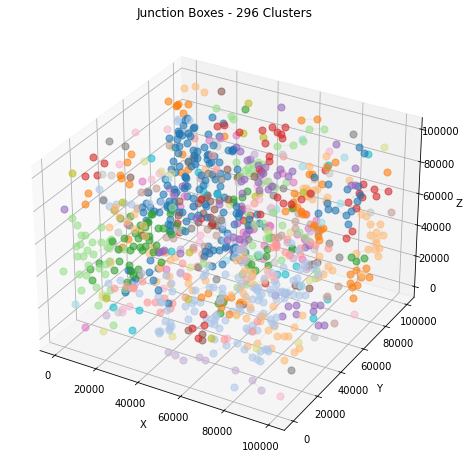

In [ ]:
# 3D scatter plot with cluster colors
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
colors = plt.cm.tab20(np.linspace(0, 1, len(clusters)))
node_colors = {}
for idx, cluster in enumerate(clusters):
    for node in cluster:
        node_colors[node] = colors[idx]
for i in range(len(coordinates)):
    ax.scatter(*coordinates[i], 
              c=[node_colors[i]], 
              s=50, 
              alpha=0.6)

# Plot edges (optional - can be slow)
for i, j in list(G.edges())[:500]:  # Limit edges for visibility
    pts = np.array([coordinates[i], coordinates[j]])
    ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], 
           'gray', alpha=0.2, linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f'Junction Boxes - {len(clusters)} Clusters')
plt.show()

### Leetcode pause:
- Redundant Connection (LC 684) https://leetcode.com/problems/redundant-connection/
- Number of Connected Components (LC 323) https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/
- Number of Provinces (LC 547) https://leetcode.com/problems/number-of-provinces/
- Graph Valid Tree (LC 261) https://leetcode.com/problems/graph-valid-tree/
- Accounts Merge (LC 721) https://leetcode.com/problems/accounts-merge/
- Connecting Cities With Minimum Cost (LC 1135) https://leetcode.com/problems/connecting-cities-with-minimum-cost/
- Min Cost to Connect All Points (LC 1584) https://leetcode.com/problems/min-cost-to-connect-all-points/


##### 1. Redundant Connection (LC 684)
**URL:** https://leetcode.com/problems/redundant-connection/

- Problem Statement
Given a graph with `n` nodes and `n` edges, find the edge that can be removed to make the graph a tree (no cycles). If multiple answers exist, return the edge that appears last in the input.

**Input:** `edges = [[1,2],[1,3],[2,3]]`  
**Output:** `[2,3]`

- Hint
Use Union-Find to detect when adding an edge would create a cycle. The first edge that connects two already-connected nodes is the answer.


In [ ]:
# URL: https://leetcode.com/problems/redundant-connection/

class Solution:
    def findRedundantConnection(self, edges: List[List[int]]) -> List[int]:
        parent = {}
        
        def find(x):
            if x not in parent:
                parent[x] = x
            if parent[x] != x:
                parent[x] = find(parent[x])  # Path compression
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x == root_y:
                return False  # Already connected - cycle detected!
            parent[root_x] = root_y
            return True
        
        for u, v in edges:
            if not union(u, v):
                return [u, v]



##### Number of Connected Components (LC 323)
**URL:** https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/

- Problem Statement
Given `n` nodes labeled `0` to `n-1` and a list of undirected edges, return the number of connected components.

**Input:** `n = 5, edges = [[0,1],[1,2],[3,4]]`  
**Output:** `2` (Components: {0,1,2} and {3,4})

- Hint
Use Union-Find to merge connected nodes. Count unique root parents at the end.



In [ ]:
# URL: https://leetcode.com/problems/number-of-connected-components-in-an-undirected-graph/

class Solution:
    def countComponents(self, n: int, edges: List[List[int]]) -> int:
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
        
        for u, v in edges:
            union(u, v)
        
        # Count unique roots
        return len(set(find(i) for i in range(n)))

##### Number of Provinces (LC 547) https://leetcode.com/problems/number-of-provinces/

- Problem Statement
Given an `n x n` matrix `isConnected` where `isConnected[i][j] = 1` if city `i` is directly connected to city `j`, return the total number of provinces (groups of connected cities).

**Input:** `isConnected = [[1,1,0],[1,1,0],[0,0,1]]`  
**Output:** `2`

- Hint
Treat it as a graph where `isConnected[i][j] = 1` means there's an edge. Use Union-Find or DFS.


In [ ]:
# URL: https://leetcode.com/problems/number-of-provinces/

class Solution:
    def findCircleNum(self, isConnected: List[List[int]]) -> int:
        n = len(isConnected)
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
        
        # Build union-find from adjacency matrix
        for i in range(n):
            for j in range(i + 1, n):
                if isConnected[i][j] == 1:
                    union(i, j)
        
        return len(set(find(i) for i in range(n)))

##### Graph Valid Tree (LC 261)
**URL:** https://leetcode.com/problems/graph-valid-tree/

- Problem Statement
Given `n` nodes and edges, determine if the edges form a valid tree. A tree must be:
1. Connected (all nodes reachable)
2. Acyclic (no cycles)

**Input:** `n = 5, edges = [[0,1],[0,2],[0,3],[1,4]]`  
**Output:** `true`

- Hint
A tree with `n` nodes must have exactly `n-1` edges. Use Union-Find to check for cycles and connectivity.


In [ ]:
# URL: https://leetcode.com/problems/graph-valid-tree/

class Solution:
    def validTree(self, n: int, edges: List[List[int]]) -> bool:
        # Tree must have exactly n-1 edges
        if len(edges) != n - 1:
            return False
        
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x == root_y:
                return False  # Cycle detected
            parent[root_x] = root_y
            return True
        
        for u, v in edges:
            if not union(u, v):
                return False
        
        return True

##### Accounts Merge (LC 721)
**URL:** https://leetcode.com/problems/accounts-merge/

- Problem Statement
Given a list of accounts where each account has a name and emails, merge accounts that share at least one email.

**Input:** `accounts = [["John","john@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com"],["John","john@mail.com","john_newyork@mail.com"]]`  
**Output:** `[["John","john@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com"]]`

- Hint
Use Union-Find where emails are nodes. Map emails to their owner's name.


In [ ]:
# URL: https://leetcode.com/problems/accounts-merge/

class Solution:
    def accountsMerge(self, accounts: List[List[str]]) -> List[List[str]]:
        from collections import defaultdict
        
        parent = {}
        email_to_name = {}
        
        def find(x):
            if x not in parent:
                parent[x] = x
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            parent[find(x)] = find(y)
        
        # Build union-find
        for account in accounts:
            name = account[0]
            first_email = account[1]
            for email in account[1:]:
                email_to_name[email] = name
                union(first_email, email)
        
        # Group emails by root parent
        components = defaultdict(list)
        for email in email_to_name:
            components[find(email)].append(email)
        
        # Format output
        return [[email_to_name[root]] + sorted(emails) 
                for root, emails in components.items()]

##### Min Cost to Connect All Points (LC 1584) 
**URL:** https://leetcode.com/problems/min-cost-to-connect-all-points/

- Problem Statement
Given `n` points on a 2D plane, connect all points with minimum total Manhattan distance.

**Input:** `points = [[0,0],[2,2],[3,10],[5,2],[7,0]]`  
**Output:** `20`

- Hint
This is **Minimum Spanning Tree (Kruskal's Algorithm)**. Generate all edges with distances, sort by distance, use Union-Find.

In [ ]:
# URL: https://leetcode.com/problems/min-cost-to-connect-all-points/

class Solution:
    def minCostConnectPoints(self, points: List[List[int]]) -> int:
        n = len(points)
        parent = list(range(n))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
                return True
            return False
        
        # Generate all edges with Manhattan distance
        edges = []
        for i in range(n):
            for j in range(i + 1, n):
                dist = abs(points[i][0] - points[j][0]) + abs(points[i][1] - points[j][1])
                edges.append((dist, i, j))
        
        # Kruskal's: sort edges and add if doesn't create cycle
        edges.sort()
        total_cost = 0
        edges_added = 0
        
        for dist, u, v in edges:
            if union(u, v):
                total_cost += dist
                edges_added += 1
                if edges_added == n - 1:  # MST complete
                    break
        
        return total_cost

##### Connecting Cities With Minimum Cost (LC 1135)
**URL:** https://leetcode.com/problems/connecting-cities-with-minimum-cost/

- Problem Statement
Connect all cities with minimum cost using given edges. Return `-1` if impossible.

**Input:** `n = 3, connections = [[1,2,5],[1,3,6],[2,3,1]]`  
**Output:** `6` (Connect 2-3 and 1-2)

- Hint
Classic MST with Union-Find. Check if all nodes are connected at the end.

In [ ]:
# URL: https://leetcode.com/problems/connecting-cities-with-minimum-cost/

class Solution:
    def minimumCost(self, n: int, connections: List[List[int]]) -> int:
        parent = list(range(n + 1))
        
        def find(x):
            if parent[x] != x:
                parent[x] = find(parent[x])
            return parent[x]
        
        def union(x, y):
            root_x, root_y = find(x), find(y)
            if root_x != root_y:
                parent[root_x] = root_y
                return True
            return False
        
        # Kruskal's Algorithm
        connections.sort(key=lambda x: x[2])  # Sort by cost
        total_cost = 0
        edges_used = 0
        
        for city1, city2, cost in connections:
            if union(city1, city2):
                total_cost += cost
                edges_used += 1
                if edges_used == n - 1:  # All cities connected
                    return total_cost
        
        return -1  # Not all cities can be connected



| Problem | Pattern | Key Concept |
|---------|---------|-------------|
| **684 - Redundant Connection** | Cycle Detection  | Find edge creating cycle |
| **323 - Connected Components** | Component Counting  | Count unique roots |
| **547 - Number of Provinces** | Component Counting  | Adjacency matrix → Union-Find |
| **261 - Graph Valid Tree** | Tree Validation  | Must have `n-1` edges + no cycles |
| **721 - Accounts Merge** | Grouping  | Merge by common emails |
| **1584 - Min Cost Connect All** | MST (Kruskal)  | Manhattan distance MST |
| **1135 - Connecting Cities** | MST (Kruskal)  | Standard MST with edges given |



* Key Takeaways

1. **Union-Find Template:**
   - `find(x)` with path compression
   - `union(x, y)` to merge components
   - Count unique roots for components

2. **MST (Kruskal's):**
   - Sort edges by weight
   - Add edge if doesn't create cycle
   - Stop when `n-1` edges added

3. **Tree Properties:**
   - Must have exactly `n-1` edges
   - Must be connected (1 component)
   - No cycles